In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Import Gdrive
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Membaca dataframe (xlsx) kelompok masing-masing dan mengubahnya ke csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_bmkg.csv')
df

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan
0,88.0,2.1,30,22.2,16.1
1,81.0,0.1,32.6,22.4,1.0
2,76.0,4.9,33.2,22.4,4.5
3,73.0,8.4,34.2,22.6,NaN
4,76.0,9.7,33.4,23.4,NaN
...,...,...,...,...,...
975,72.0,6.3,33,25,0.0
976,70.0,6.5,33.4,25,NaN
977,68.0,5.5,33.6,24.8,0.0
978,79.0,7.5,33.6,25,0.0


In [ ]:
df.isnull().sum().sum()

378

#  Mengenali outliers untuk kesepuluh fitur dan menggantinya dengan NaN

In [ ]:
# periksa baris-baris curah hujan yang mengandung outliers
for n in range (0, 978):
  # jika lebih dari kondisi maka ubah value menjadi NaN
  if df.at[n, 'Curah Hujan'] > 120:
    df.at[n, 'Curah Hujan'] = np.nan

In [ ]:
# periksa baris-baris kelembaban yang mengandung outliers
for n in range (0, 978):
  # jika lebih dari kondisi maka ubah value menjadi NaN
  if df.at[n, 'Kelembaban'] > 100:
    df.at[n, 'Kelembaban'] = np.nan

In [ ]:
# periksa baris-baris Lamanya Penyinaran yang mengandung outliers
for n in range (0, 978):
  # jika lebih dari kondisi maka ubah value menjadi NaN
  if df.at[n, 'Lamanya Penyinaran'] > 12:
    df.at[n, 'Lamanya Penyinaran'] = np.nan

In [ ]:
df['Temp Maks'] = df['Temp Maks'].astype(float)
# periksa baris-baris Temp Maks yang mengandung outliers
for n in range (0, 978):
  # jika lebih dari kondisi maka ubah value menjadi NaN
  if df.at[n, 'Temp Maks'] > 45:
    df.at[n, 'Temp Maks'] = np.nan

In [ ]:
df['Temp Min'] = df['Temp Min'].astype(float)
# periksa baris-baris Temp Min yang mengandung outliers
for n in range (0, 978):
  # jika lebih dari kondisi maka ubah value menjadi NaN
  if df.at[n, 'Temp Min'] < 15:
    df.at[n, 'Temp Min'] = np.nan

In [ ]:
df

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan
0,88.0,2.1,30.0,22.2,16.1
1,81.0,0.1,32.6,22.4,1.0
2,76.0,4.9,33.2,22.4,4.5
3,73.0,8.4,34.2,22.6,NaN
4,76.0,9.7,33.4,23.4,NaN
...,...,...,...,...,...
975,72.0,6.3,33.0,25.0,0.0
976,70.0,6.5,33.4,25.0,NaN
977,68.0,5.5,33.6,24.8,0.0
978,79.0,7.5,33.6,25.0,0.0


# Mengenali baris yang mengandung data NaN dan menghapus baris tersebut

In [ ]:
# Mengenali baris yang mengandung data NaN
df.isnull()

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,True
...,...,...,...,...,...
975,False,False,False,False,False
976,False,False,False,False,True
977,False,False,False,False,False
978,False,False,False,False,False


In [ ]:
df.isnull().sum().sum()

510

In [ ]:
# Menghapus baris yang mengandung NaN
df = df.dropna()
df

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan
0,88.0,2.1,30.0,22.2,16.1
1,81.0,0.1,32.6,22.4,1.0
2,76.0,4.9,33.2,22.4,4.5
5,79.0,5.9,33.5,23.3,46.0
8,84.0,6.0,32.0,23.3,3.5
...,...,...,...,...,...
973,78.0,3.7,31.4,25.6,0.0
974,75.0,2.7,33.2,24.0,3.1
975,72.0,6.3,33.0,25.0,0.0
977,68.0,5.5,33.6,24.8,0.0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.loc[df['Curah Hujan'] == 8888.0]

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan


# Data sudah selesai dibersihkan
Selanjutnya kita akan menambahkan kolom Curah Hujan (d+1) yang berisikan value dari kolom hujan dimulai dari baris kedua

In [ ]:
for n in range(0, 543):
  df.loc[df.index[n], 'Curah Hujan (d+1)'] = df.loc[df.index[n+1], 'Curah Hujan'] 

#df.loc[df.index[529], 'Curah Hujan (d+1)'] = np.nan
df

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1)
0,88.0,2.1,30.0,22.2,16.1,1.0
1,81.0,0.1,32.6,22.4,1.0,4.5
2,76.0,4.9,33.2,22.4,4.5,46.0
5,79.0,5.9,33.5,23.3,46.0,3.5
8,84.0,6.0,32.0,23.3,3.5,16.6
...,...,...,...,...,...,...
973,78.0,3.7,31.4,25.6,0.0,3.1
974,75.0,2.7,33.2,24.0,3.1,0.0
975,72.0,6.3,33.0,25.0,0.0,0.0
977,68.0,5.5,33.6,24.8,0.0,0.0


# Membagi dataset menjadi dua


*   dfLatih = Dataset latihan berisi 519 Baris
*   dfUji = Dataset uji berisi 10 Baris



In [ ]:
# Menaruh nilai df ke dalam dataframe bernama dfLatih
dfLatih = df
dfLatih

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1)
0,88.0,2.1,30.0,22.2,16.1,1.0
1,81.0,0.1,32.6,22.4,1.0,4.5
2,76.0,4.9,33.2,22.4,4.5,46.0
5,79.0,5.9,33.5,23.3,46.0,3.5
8,84.0,6.0,32.0,23.3,3.5,16.6
...,...,...,...,...,...,...
973,78.0,3.7,31.4,25.6,0.0,3.1
974,75.0,2.7,33.2,24.0,3.1,0.0
975,72.0,6.3,33.0,25.0,0.0,0.0
977,68.0,5.5,33.6,24.8,0.0,0.0


In [ ]:
# Menentukan nilai max dan min Kelembaban
columnKelembaban = dfLatih['Kelembaban']
maxValueKelembaban = columnKelembaban.max()
print (maxValueKelembaban)

columnKelembaban = dfLatih['Kelembaban']
minValueKelembaban = columnKelembaban.min()
print (minValueKelembaban)

97.0
57.0


In [ ]:
# Menentukan nilai max dan min Lama Penyinaran
columnLama = dfLatih['Lamanya Penyinaran']
maxValueLama = columnLama.max()
print (maxValueLama)

columnLama = dfLatih['Lamanya Penyinaran']
minValueLama = columnLama.min()
print (minValueLama)

10.5
0.0


In [ ]:
# Menentukan nilai max dan min Temperatur Maksimal
columnTempMaks = dfLatih['Temp Maks']
maxValueTempMaks = columnTempMaks.max()
print (maxValueTempMaks)

columnTempMaks = dfLatih['Temp Maks']
minValueTempMaks = columnTempMaks.min()
print (minValueTempMaks)

37.2
26.8


In [ ]:
# Menentukan nilai max dan min Temperatur Minimal
columnTempMin = dfLatih['Temp Min']
maxValueTempMin = columnTempMin.max()
print (maxValueTempMin)

columnTempMin = dfLatih['Temp Min']
minValueTempMin = columnTempMin.min()
print (minValueTempMin)

27.0
21.2


In [ ]:
# Menentukan nilai max dan min Curah Hujan
columnCurahHujan = dfLatih['Curah Hujan']
maxValueCurahHujan = columnCurahHujan.max()
print (maxValueCurahHujan)

columnCurahHujan = dfLatih['Curah Hujan']
minValueCurahHujan = columnCurahHujan.min()
print (minValueCurahHujan)

118.9
0.0


In [ ]:
# Menentukan nilai max dan min Curah Hujan (d+1)
columnBesok = dfLatih['Curah Hujan (d+1)']
maxValueBesok = columnBesok.max()
print (maxValueBesok)

columnBesok = dfLatih['Curah Hujan (d+1)']
minValueBesok = columnBesok.min()
print (minValueBesok)

118.9
0.0


# Melakukan normalisasi terhadap nilai di dalam dataframe dfLatih

In [ ]:
for n in range(0, 543):
  dfLatih.loc[df.index[n], 'Kelembaban'] = ((dfLatih.loc[df.index[n], 'Kelembaban'])-minValueKelembaban)/(maxValueKelembaban-minValueKelembaban)
  dfLatih.loc[df.index[n], 'Lamanya Penyinaran'] = ((dfLatih.loc[df.index[n], 'Lamanya Penyinaran'])-minValueLama)/(maxValueLama-minValueLama)
  dfLatih.loc[df.index[n], 'Temp Maks'] = ((dfLatih.loc[df.index[n], 'Temp Maks'])-minValueTempMaks)/(maxValueTempMaks-minValueTempMaks)
  dfLatih.loc[df.index[n], 'Temp Min'] = ((dfLatih.loc[df.index[n], 'Temp Min'])-minValueTempMin)/(maxValueTempMin-minValueTempMin)
  dfLatih.loc[df.index[n], 'Curah Hujan'] = ((dfLatih.loc[df.index[n], 'Curah Hujan'])-minValueCurahHujan)/(maxValueCurahHujan-minValueCurahHujan)
  dfLatih.loc[df.index[n], 'Curah Hujan (d+1)'] = ((dfLatih.loc[df.index[n], 'Curah Hujan (d+1)'])-minValueBesok)/(maxValueBesok-minValueBesok)

dfLatih

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1)
0,0.775,0.200000,0.307692,0.172414,0.135408,0.008410
1,0.600,0.009524,0.557692,0.206897,0.008410,0.037847
2,0.475,0.466667,0.615385,0.206897,0.037847,0.386880
5,0.550,0.561905,0.644231,0.362069,0.386880,0.029437
8,0.675,0.571429,0.500000,0.362069,0.029437,0.139613
...,...,...,...,...,...,...
973,0.525,0.352381,0.442308,0.758621,0.000000,0.026072
974,0.450,0.257143,0.615385,0.482759,0.026072,0.000000
975,0.375,0.600000,0.596154,0.655172,0.000000,0.000000
977,0.275,0.523810,0.653846,0.620690,0.000000,0.000000


# Dataframe latihan hanya berisikan 519 baris saja

In [ ]:
# Mengambil hanya 519 baris ke dataframe dfLatih untuk dijadikan dataset latih
dfLatih = df.iloc[0:519]
dfLatih

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1)
0,0.775,0.200000,0.307692,0.172414,0.135408,0.008410
1,0.600,0.009524,0.557692,0.206897,0.008410,0.037847
2,0.475,0.466667,0.615385,0.206897,0.037847,0.386880
5,0.550,0.561905,0.644231,0.362069,0.386880,0.029437
8,0.675,0.571429,0.500000,0.362069,0.029437,0.139613
...,...,...,...,...,...,...
921,0.325,0.571429,0.634615,0.275862,0.000000,0.201850
923,0.375,0.504762,0.692308,0.551724,0.201850,0.000000
925,0.550,0.257143,0.500000,0.551724,0.000000,0.000000
927,0.400,0.533333,0.653846,0.517241,0.000000,0.164844


In [ ]:
# Mengambil hanya 10 baris ke dataframe dfUji untuk dijadikan dataset Uji
dfUji = df.iloc[520:530] # dari baris ke 520 sampai 530
dfUji

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1)
934,0.800,0.142857,0.384615,0.551724,0.281749,0.037847
936,0.525,0.276190,0.644231,0.275862,0.037847,0.000000
940,0.375,0.914286,0.730769,0.241379,0.000000,0.539108
943,0.675,0.266667,0.557692,0.517241,0.539108,0.037847
944,0.650,0.619048,0.557692,0.586207,0.037847,0.306140
948,0.475,0.333333,0.576923,0.241379,0.306140,0.000000
949,0.500,0.857143,0.673077,0.310345,0.000000,0.000000
950,0.450,0.914286,0.692308,0.758621,0.000000,0.445753
952,0.725,0.742857,0.634615,0.482759,0.445753,0.000000
955,0.550,0.952381,0.538462,0.482759,0.000000,0.000000


# Menerapkan Algoritma K-NN

In [ ]:
# Melakukan import untuk library yang diperlukan
import math
import statistics

In [ ]:
# disini akan dilakukan loop bersarang untuk mencari nilai Euclidean Distance tiap data uji lalu melanjutkannya dengan menentukan nilai prediksi tiap baris dari data uji
for n in range(0, 10): # Melakukan looping untuk tiap baris dari data uji
  barisUji = dfUji.iloc[n]
  for x in range(0, 519): # Melakukan looping untuk tiap baris dari data latihan
    barisLatih = dfLatih.iloc[x]
    # Menambahkan kolom Euclidean Distance lalu Memasukkan nilai yang berisikan rumus Euclidean Distance ke dalam looping
    # Antara dua input dari 5 kolom
    # a = baris dari data uji
    # b = baris dari data latih
    # Akar (((a1 - b1)**2) - ((a2 - b2)**2) - ((a3 - b3)**2) - ((a4 - b4)**2) - ((a5 - b5)**2))
    dfLatih.loc[dfLatih.index[x], 'Euclidean Distance'] = math.sqrt(((barisUji["Kelembaban"]-barisLatih["Kelembaban"])**2) + ((barisUji["Lamanya Penyinaran"]-barisLatih["Lamanya Penyinaran"])**2) + ((barisUji["Temp Maks"]-barisLatih["Temp Maks"])**2) + ((barisUji["Temp Min"]-barisLatih["Temp Min"])**2) + ((barisUji["Curah Hujan"]-barisLatih["Curah Hujan"])**2))
  
  # Melakukan print terhadap 10 data latih yang sekarang telah memiliki kolom Euclidean Distance
  print (dfLatih)

  # Mencari 5 baris yang memiliki nilai terkecil di kolom Euclidean Distance
  kolomDistance = dfLatih.nsmallest(5, 'Euclidean Distance')
  # Mengambil nilai pada kolom Curah Hujan (d+1) yang memiliki nilai Euclidean Distance terkecil lalu menaruhnya di variabel k5
  k5 = kolomDistance["Curah Hujan (d+1)"]
  # Mencari rata-rata dari k=5
  average = statistics.mean(k5)
  # Menambahkan kolom Prediksi Curah Hujan (d+1) dan memasukkan nilai rata-rata dari k=5 dari tiap baris data yang diuji
  dfUji.loc[dfUji.index[n], 'Prediksi Curah Hujan (d+1)'] = average

     Kelembaban  Lamanya Penyinaran  ...  Curah Hujan (d+1)  Euclidean Distance
0         0.775            0.200000  ...           0.008410            0.418449
1         0.600            0.009524  ...           0.037847            0.530428
2         0.475            0.466667  ...           0.386880            0.664926
5         0.550            0.561905  ...           0.029437            0.593736
8         0.675            0.571429  ...           0.139613            0.558787
..          ...                 ...  ...                ...                 ...
921       0.325            0.571429  ...           0.201850            0.792011
923       0.375            0.504762  ...           0.000000            0.642385
925       0.550            0.257143  ...           0.000000            0.410192
927       0.400            0.533333  ...           0.164844            0.682297
931       0.675            0.323810  ...           0.123633            0.283029

[519 rows x 7 columns]
     Kelembaban 

In [ ]:
# Memanggil data uji telah memiliki kolom Prediksi Curah Hujan (d+1)
dfUji

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1),Prediksi Curah Hujan (d+1)
934,0.800,0.142857,0.384615,0.551724,0.281749,0.037847,0.120437
936,0.525,0.276190,0.644231,0.275862,0.037847,0.000000,0.203364
940,0.375,0.914286,0.730769,0.241379,0.000000,0.539108,0.014130
943,0.675,0.266667,0.557692,0.517241,0.539108,0.037847,0.121783
944,0.650,0.619048,0.557692,0.586207,0.037847,0.306140,0.042052
948,0.475,0.333333,0.576923,0.241379,0.306140,0.000000,0.125147
949,0.500,0.857143,0.673077,0.310345,0.000000,0.000000,0.047098
950,0.450,0.914286,0.692308,0.758621,0.000000,0.445753,0.030950
952,0.725,0.742857,0.634615,0.482759,0.445753,0.000000,0.046594
955,0.550,0.952381,0.538462,0.482759,0.000000,0.000000,0.037511


# Hitung RMSE

In [ ]:
# Mencari RMSE

for n in range(0, 10): # Melakukan looping sebanyak data uji
  # Menambahkan kolom RMSE dan memasukkan nilai yang berisikan rumus mencari RMSE dari nilai riil dan nilai prediksi
  # (Nilai Riil - Nilai prediksi)**2
  dfUji.loc[dfUji.index[n], 'RMSE'] = ((df.loc[dfUji.index[n], 'Curah Hujan (d+1)']) - (dfUji.loc[dfUji.index[n], 'Prediksi Curah Hujan (d+1)']))**2

dfUji

,Kelembaban,Lamanya Penyinaran,Temp Maks,Temp Min,Curah Hujan,Curah Hujan (d+1),Prediksi Curah Hujan (d+1),RMSE
934,0.800,0.142857,0.384615,0.551724,0.281749,0.037847,0.120437,0.006821
936,0.525,0.276190,0.644231,0.275862,0.037847,0.000000,0.203364,0.041357
940,0.375,0.914286,0.730769,0.241379,0.000000,0.539108,0.014130,0.275603
943,0.675,0.266667,0.557692,0.517241,0.539108,0.037847,0.121783,0.007045
944,0.650,0.619048,0.557692,0.586207,0.037847,0.306140,0.042052,0.069742
948,0.475,0.333333,0.576923,0.241379,0.306140,0.000000,0.125147,0.015662
949,0.500,0.857143,0.673077,0.310345,0.000000,0.000000,0.047098,0.002218
950,0.450,0.914286,0.692308,0.758621,0.000000,0.445753,0.030950,0.172061
952,0.725,0.742857,0.634615,0.482759,0.445753,0.000000,0.046594,0.002171
955,0.550,0.952381,0.538462,0.482759,0.000000,0.000000,0.037511,0.001407


In [ ]:
# Mencari nilai RMSE dengan mencari nilai rata-rata dari kolom RMSE dari dfUji
RMSE = dfUji['RMSE'].mean()
# Menampilkan nilai RMSE
print(f'RMSE : {RMSE}')

RMSE : 0.05940876311521156


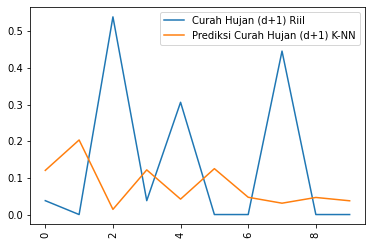

In [ ]:
# Membuat variabel bykData untuk mengetahui berapa banyak row yang terdapat di dalam data uji
bykData = len(dfUji.index)
# Membuat array jmlUji untuk menampung nilai looping
jmlUji = []
for n in range(bykData): # Melakukan looping
  jmlUji.append(n) # Menambah n ke dalam array jmlUji

# Visualisasikan data riil dan data hasil dari metode K-NN
plt.plot(jmlUji, dfUji['Curah Hujan (d+1)'])
plt.plot(jmlUji, dfUji['Prediksi Curah Hujan (d+1)'])
plt.legend(['Curah Hujan (d+1) Riil', 'Prediksi Curah Hujan (d+1) K-NN'])
plt.xticks(rotation = 'vertical')
plt.show()

# Melakukan Denormalisasi pada kolom Prediksi Curah Hujan (d+1)

In [ ]:
# Menentukan nilai max dan min Prediksi Curah Hujan (d+1)
columnPrediksi = dfUji['Prediksi Curah Hujan (d+1)']
maxValuePrediksi = columnPrediksi.max()
print (maxValuePrediksi)

columnPrediksi = dfUji['Prediksi Curah Hujan (d+1)']
minValuePrediksi = columnPrediksi.min()
print (minValuePrediksi)

0.2033641715727502
0.014129520605550883


In [ ]:
for n in range(0, 10): # Melakukan looping sebanyak data uji
  # Melakukan denormalisasi pada kolom Prediksi Curah Hujan (d+1)
  # y = min + ynorm * (max - min)
  dfUji.loc[dfUji.index[n], 'Prediksi Curah Hujan (d+1)'] = (minValuePrediksi + (dfUji.loc[dfUji.index[n], 'Prediksi Curah Hujan (d+1)']) * (maxValuePrediksi - minValuePrediksi))

print ("Denormalisasi Prediksi Curah Hujan (d+1):")
print (dfUji['Prediksi Curah Hujan (d+1)'])

Denormalisasi Prediksi Curah Hujan (d+1):
934    0.036920
936    0.052613
940    0.016803
943    0.037175
944    0.022087
948    0.037812
949    0.023042
950    0.019986
952    0.022947
955    0.021228
Name: Prediksi Curah Hujan (d+1), dtype: float64
